# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
**Objetivo del Ejercicio**: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos  reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:


In [1]:
# Importar bibliotecas necesarias para el tratamiento de datos
# ---------------------------------------------------
import pandas as pd
import numpy as np

# Bibliotecas de visualización
# ----------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, stats, t, levene, mannwhitneyu

In [2]:
# Se establece el estilo del fondo de las gráficas oscuro
sns.set_style("dark")

# Se establece el estilo general en 'ddark_background'.
plt.style.use('dark_background')

1. **Preparación de Datos**:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [3]:
df = pd.read_csv('../data/customers.csv', index_col=0)
df.sample(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
95702,222490,2018,2,7,0,7,1204,150.00,0,0,...,Bachelor,Divorced,Nova,20314.44,Standard,2015,8,NaN,NaN,62800.00
25550,250363,2018,5,3,0,3,3189,318.00,0,0,...,Bachelor,Single,Star,2534.95,2018 Promotion,2018,3,2018.0,11.0,68787.00
175875,875707,2018,12,13,0,13,1053,105.00,0,0,...,Bachelor,Married,Star,8082.88,Standard,2017,11,NaN,NaN,71095.00
61655,212230,2017,10,13,5,18,3348,334.00,0,0,...,Bachelor,Married,Aurora,6102.31,Standard,2013,12,NaN,NaN,63225.00
93737,789797,2018,3,4,0,4,812,101.25,0,0,...,College,Single,Nova,3788.81,Standard,2014,1,NaN,NaN,79666.88


In [4]:
df_vuelos_educacion = df[['education', 'flights_booked']]
df_vuelos_educacion.sample(5)

,education,flights_booked
98032,Bachelor,2
68894,Bachelor,6
140790,Bachelor,1
7493,Bachelor,4
98324,Bachelor,9


2. **Análisis Descriptivo**:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

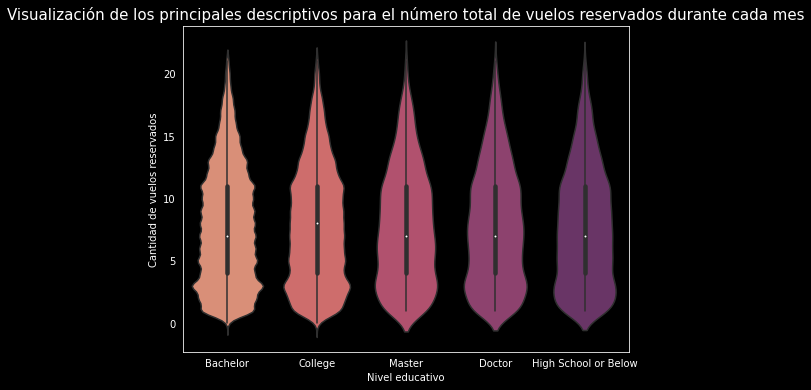

In [5]:
# Se crea un boxplot para visualizar los principales estadísticos 
# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando el método boxplot visualizamos la mediana, cambiamos el color del boxplot
sns.violinplot(x='education', 
            y= 'flights_booked',
            data=df_vuelos_educacion, 
            palette='flare')

# Etiquetas y título
plt.xlabel('Nivel educativo', fontsize=10)
plt.ylabel('Cantidad de vuelos reservados', fontsize=10)
plt.title('Visualización de los principales descriptivos para el número total de vuelos reservados durante cada mes', fontsize=15);

In [6]:
media = df_vuelos_educacion.groupby('education')['flights_booked'].mean().round(2)
mediana = df_vuelos_educacion.groupby('education')['flights_booked'].median().round(2)
moda = df_vuelos_educacion.groupby('education')['flights_booked'].agg(pd.Series.mode).round(2)
varianza = df_vuelos_educacion.groupby('education')['flights_booked'].var().round(2)
desviacion_std = df_vuelos_educacion.groupby('education')['flights_booked'].std().round(2)
percentil25 = df_vuelos_educacion.groupby('education')['flights_booked'].apply(lambda x: np.percentile(x, 25))
percentil75 = df_vuelos_educacion.groupby('education')['flights_booked'].apply(lambda x: np.percentile(x, 75))

In [7]:
print("La media de vuelos reservados segun nivel educativo es:")
display(media)
print("------------------------------------------------------")
print("La mediana de vuelos reservados segun nivel educativo es:")
display(mediana)
print("------------------------------------------------------")
print("La moda de vuelos reservados segun nivel educativo es:")
display(moda)
print("------------------------------------------------------")
print("La varianza de vuelos reservados segun nivel educativo es:")
display(varianza)
print("------------------------------------------------------")
print("La desviacion estándar de vuelos reservados segun nivel educativo es:")
display(desviacion_std)
print("------------------------------------------------------")
print("El percentil 25 de vuelos reservados segun nivel educativo es:}")
display(percentil25)
print("------------------------------------------------------")
print("El percentil 75 de vuelos reservados segun nivel educativo es:")
display(percentil75)
print("------------------------------------------------------")

La media de vuelos reservados segun nivel educativo es:


education
Bachelor                7.85
College                 7.91
Doctor                  7.89
High School or Below    7.81
Master                  7.83
Name: flights_booked, dtype: float64

------------------------------------------------------
La mediana de vuelos reservados segun nivel educativo es:


education
Bachelor                7.0
College                 8.0
Doctor                  7.0
High School or Below    7.0
Master                  7.0
Name: flights_booked, dtype: float64

------------------------------------------------------
La moda de vuelos reservados segun nivel educativo es:


education
Bachelor                3
College                 3
Doctor                  3
High School or Below    3
Master                  3
Name: flights_booked, dtype: int64

------------------------------------------------------
La varianza de vuelos reservados segun nivel educativo es:


education
Bachelor                22.09
College                 22.04
Doctor                  22.39
High School or Below    22.12
Master                  21.63
Name: flights_booked, dtype: float64

------------------------------------------------------
La desviacion estándar de vuelos reservados segun nivel educativo es:


education
Bachelor                4.70
College                 4.70
Doctor                  4.73
High School or Below    4.70
Master                  4.65
Name: flights_booked, dtype: float64

------------------------------------------------------
El percentil 25 de vuelos reservados segun nivel educativo es:}


education
Bachelor                4.0
College                 4.0
Doctor                  4.0
High School or Below    4.0
Master                  4.0
Name: flights_booked, dtype: float64

------------------------------------------------------
El percentil 75 de vuelos reservados segun nivel educativo es:


education
Bachelor                11.0
College                 11.0
Doctor                  11.0
High School or Below    11.0
Master                  11.0
Name: flights_booked, dtype: float64

------------------------------------------------------


3. **Prueba Estadística**:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [8]:
df_vuelos_educacion['nivel_educativo'] = np.where((df['education'] =='High School or Below') | (df['education'] =='College'), 'bajo', 'alto')
df_vuelos_educacion

/tmp/ipykernel_23905/1262421570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vuelos_educacion['nivel_educativo'] = np.where((df['education'] =='High School or Below') | (df['education'] =='College'), 'bajo', 'alto')


,education,flights_booked,nivel_educativo
0,Bachelor,3,alto
1,College,10,bajo
2,College,6,bajo
3,Bachelor,0,alto
4,Bachelor,6,alto
...,...,...,...
176914,College,11,bajo
176915,Doctor,15,alto
176916,Bachelor,11,alto
176917,College,1,bajo


In [9]:
df_media = df_vuelos_educacion.groupby('nivel_educativo').mean().reset_index()
df_media

,nivel_educativo,flights_booked
0,alto,7.854678
1,bajo,7.896628


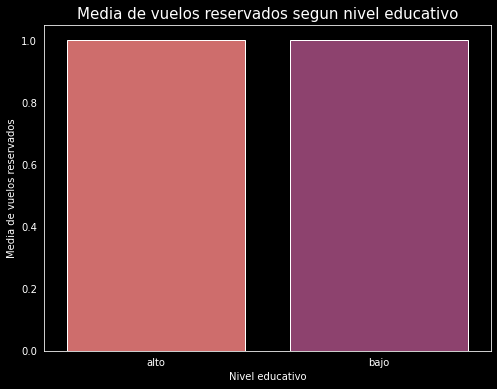

In [10]:
# Se crea un countplot para visualizar la diferencia de las medias de vuelos reservados entre diferentes niveles educativos

# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

sns.countplot(x = "nivel_educativo", data = df_media, palette='flare');

# Etiquetas y título
plt.xlabel('Nivel educativo', fontsize=10)
plt.ylabel('Media de vuelos reservados', fontsize=10)
plt.title('Media de vuelos reservados segun nivel educativo', fontsize=15);

Para realiza la prueba A/B se usarán las medias de las cantidades de vuelos reservados por nivel educativo y para ello hay que evaluar primero que los datos siguen una distribución normal y tienen Homogeneidad de varianzas.

#### Normalidad
**Hipótesis Nula (H0):** Los datos provienen de una distribución normal.  
**Hipótesis Alternativa (H1):** Los datos no provienen de una distribución normal.

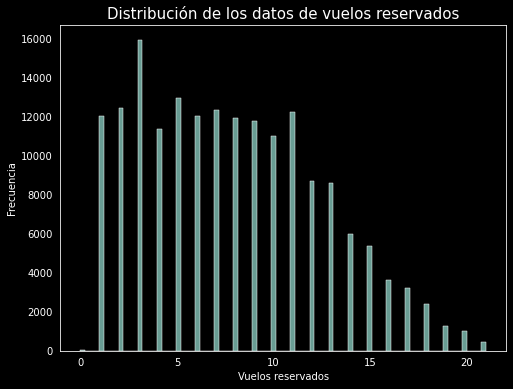

In [11]:
# Se crea un histplot para visualizar la distribución de lso datos de vuelos reservados 
# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando el método boxplot visualizamos la mediana, cambiamos el color del boxplot
sns.histplot(data=df_vuelos_educacion, 
             x='flights_booked', 
             palette='flare');

# Etiquetas y título
plt.xlabel('Vuelos reservados', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Distribución de los datos de vuelos reservados', fontsize=15);

In [12]:
# Realizar una prueba de normalidad (usando la prueba de Shapiro-Wilk)
p_value = shapiro(df_vuelos_educacion['flights_booked']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 0.0 )


/home/karvala/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Homogeneidad de varianzas

In [13]:
def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    _, p_value = levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [14]:
homogeneidad(df_vuelos_educacion ,'nivel_educativo', 'flights_booked')

Para la métrica flights_booked las varianzas son homogéneas entre grupos.


Los datos no cumplen una distribución normal, por lo tanto nos decantaremos por una prueba no paramétrica como  el **Test de Mann Whitney**

In [15]:
# vamos a crear una función para calcular este test y ver si hay diferencias entre los grupos de estudio

def test_man_whitney(dataframe, metrica, grupo_control, grupo_test, columna_grupos):

    """
    Realiza la prueba de Mann-Whitney U para comparar las medianas de las métricas entre dos grupos en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - metrica (str): nombre de la columna que representa la métrica a comparar entre los grupos.
    - grupo_control (str): El nombre del grupo de control en la columna especificada por columna_grupos.
    - grupo_test (str): El nombre del grupo de test en la columna especificada por columna_grupos.
    - columna_grupos (str): El nombre de la columna que contiene la información de los grupos. 

    Returns 
    No devuelve nada directamente, pero imprime en la consola si las medianas son diferentes o iguales para cada métrica.
    Se utiliza la prueba de Mann-Whitney U para evaluar si hay diferencias significativas entre los grupos.
    """
    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
    # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
    metrica_control = control[metrica]
    metrica_test = test[metrica]
        
    # aplicamos el estadístico
    _, p_value = mannwhitneyu(metrica_control, metrica_test)
        
    if p_value < 0.05:
        print(f"Para la métrica {metrica}, las medias son diferentes.")
    else:
        print(f"Para la métrica {metrica}, las medias son iguales.")

In [16]:
## llamamos a la función
test_man_whitney(df_vuelos_educacion, 'flights_booked', 'bajo', 'alto', 'nivel_educativo')

Para la métrica flights_booked, las medias son iguales.


Las medias de vuelos reservados son iguales para los niveles educativos bajo y alto y, por lo tanto, no hay diferencias significativas entre los vuelos reservados por nivel educativo. Aunque, se podría hacer un test A/B para los diferentes niveles educativos cada uno por separado, sin agrupar.